# A survey on the general concept of diabetes among students of different universities in Bangladesh.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats 
import researchpy as rp 
sns.set_style('whitegrid')

In [48]:
df = pd.read_excel('Diabetes_Study.xlsx')
df.head() 

,Participants,Name,Age,Gender,Village,Thana,Distric,Type of disease,Regularly taken medication,Diabetes,...,No. of days in a week engaged in activities,Amount of time spend in activity,Walking 10 minutes at a straight,No.of days of walking about 10 minutes in a week,Fitness activity in a week,Amount of time spent in fitness activities,Sleeping in a whole day,Sleeping at night time,NAP,Disturbance in sleep
0,1,Akbar mondol,70,M,Shablat,Shalikha,Magura,N,N,N,...,0,0,Y,3,0,0,6,6,0,N
1,2,Momena khatun,65,F,Shablat,Shalikha,Magura,"Asthama, CVD",N,N,...,0,0,N,0,0,0,8,8,0,N
2,3,Ratna khatun,35,F,Shablat,Shalikha,Magura,N,N,N,...,7,6,Y,7,0,0,6,6,0,N
3,4,Saijoddi rahman,38,M,Shablat,Shalikha,Magura,N,N,N,...,7,5,Y,7,0,0,7,7,0,N
4,5,Uzzal,32,F,Shablat,Shalikha,Magura,Night fever,N,N,...,7,5,Y,7,0,0,6,6,0,N


## Take a Look at Dataset

In [49]:
# shape 
df.shape 

(700, 43)

In [50]:
# columns 
df.columns

Index(['Participants', 'Name', 'Age', 'Gender', 'Village', 'Thana', 'Distric',
       'Type of disease', 'Regularly taken medication', 'Diabetes',
       'Steps to control diabetes', 'Blood pressure',
       'Diabetic patient in family history',
       'Knowledge about drug induce diabetes',
       'Knowledge about diabetes in children and young adult',
       'Knowledge about diabetes and pregnency',
       'Currently smoking tobacco product',
       'Previously somking tobacco products',
       'Age when tobacco products were taken first',
       'Age of stopping tobacco products', 'Taking betel', 'Taking betel nut',
       'Tobaco with betel', 'Relationship between smoking and cancer',
       'Relationship between smoking and diabetes',
       'No. of days of eating fruits in a week',
       'No. of days of eating vegetables in a week',
       'No.of days of eating meats in week',
       'No.of days of eating fish in week',
       'No.of days of eating milk in week',
       'No.of d

In [51]:
# dtypes 
df.dtypes

Participants                                             int64
Name                                                    object
Age                                                      int64
Gender                                                  object
Village                                                 object
Thana                                                   object
Distric                                                 object
Type of disease                                         object
Regularly taken medication                              object
Diabetes                                                object
Steps to control diabetes                               object
Blood pressure                                          object
Diabetic patient in family history                      object
Knowledge about drug induce diabetes                    object
Knowledge about diabetes in children and young adult    object
Knowledge about diabetes and pregnency                 

In [7]:
# info 
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 43 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   Participants                                          700 non-null    int64 
 1   Name                                                  700 non-null    object
 2   Age                                                   700 non-null    int64 
 3   Gender                                                700 non-null    object
 4   Village                                               700 non-null    object
 5   Thana                                                 700 non-null    object
 6   Distric                                               700 non-null    object
 7   Type of disease                                       700 non-null    object
 8   Regularly taken medication                            700 non-null    

In [52]:
# summary stats 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Participants,700.0,350.500000,202.216880,1.0,175.75,350.5,525.25,700.0
Age,700.0,39.892857,13.456812,20.0,28.00,40.0,50.00,80.0
No. of days of eating fruits in a week,700.0,2.605714,1.330385,0.0,2.00,3.0,3.00,7.0
No. of days of eating vegetables in a week,700.0,6.771429,0.526044,4.0,7.00,7.0,7.00,7.0
No.of days of eating meats in week,700.0,1.191429,0.935967,0.0,1.00,1.0,2.00,5.0
No.of days of eating fish in week,700.0,5.881429,1.445806,0.0,5.00,7.0,7.00,7.0
No.of days of eating milk in week,700.0,2.492857,2.745516,0.0,0.00,2.0,5.00,7.0
No.of days of eating lentil in week,700.0,1.414286,1.313437,0.0,0.00,1.0,2.00,7.0
No.of days of eating soft drinks in week,700.0,0.370000,0.853479,0.0,0.00,0.0,0.00,5.0
No. of days in a week engaged in activities,700.0,4.662857,2.962434,0.0,2.00,7.0,7.00,7.0


In [53]:
# categorical columns 
categorical_df = df.select_dtypes(include=['object'])
categorical_df.head() 

,Name,Gender,Village,Thana,Distric,Type of disease,Regularly taken medication,Diabetes,Steps to control diabetes,Blood pressure,...,Age of stopping tobacco products,Taking betel,Taking betel nut,Tobaco with betel,Relationship between smoking and cancer,Relationship between smoking and diabetes,Amount of slat taken with foods,Amount of time spend in activity,Walking 10 minutes at a straight,Disturbance in sleep
0,Akbar mondol,M,Shablat,Shalikha,Magura,N,N,N,N,L,...,N,N,N,N,Y,N,H,0,Y,N
1,Momena khatun,F,Shablat,Shalikha,Magura,"Asthama, CVD",N,N,N,H,...,N,Y,N,Y,Y,N,N,0,N,N
2,Ratna khatun,F,Shablat,Shalikha,Magura,N,N,N,N,No.,...,N,N,N,N,Y,N,N,6,Y,N
3,Saijoddi rahman,M,Shablat,Shalikha,Magura,N,N,N,N,No.,...,N,N,N,N,Y,N,N,5,Y,N
4,Uzzal,F,Shablat,Shalikha,Magura,Night fever,N,N,N,No.,...,N,N,N,N,Y,N,H,5,Y,N


In [54]:
categorical_df.columns

Index(['Name', 'Gender', 'Village', 'Thana', 'Distric', 'Type of disease',
       'Regularly taken medication', 'Diabetes', 'Steps to control diabetes',
       'Blood pressure', 'Diabetic patient in family history',
       'Knowledge about drug induce diabetes',
       'Knowledge about diabetes in children and young adult',
       'Knowledge about diabetes and pregnency',
       'Currently smoking tobacco product',
       'Previously somking tobacco products',
       'Age when tobacco products were taken first',
       'Age of stopping tobacco products', 'Taking betel', 'Taking betel nut',
       'Tobaco with betel', 'Relationship between smoking and cancer',
       'Relationship between smoking and diabetes',
       'Amount of slat taken with foods', 'Amount of time spend in activity',
       'Walking 10 minutes at a straight ', 'Disturbance in sleep'],
      dtype='object')

In [66]:
# gender frequency table 
rp.summary_cat(categorical_df['Gender'])

,Variable,Outcome,Count,Percent
0,Gender,M,438,62.57
1,,F,262,37.43


In [65]:
# summary of village, thana and district 
rp.summary_cat(categorical_df[['Village', 'Thana', 'Distric']])

,Variable,Outcome,Count,Percent
0,Village,Tilkhari,219,31.29
1,,Singra,205,29.29
2,,Dhawkhali,135,19.29
3,,Shablat,82,11.71
4,,Talian,59,8.43
5,Thana,Shalikha,641,91.57
6,,Kaligonj,59,8.43
7,Distric,Magura,641,91.57
8,,Jhenidah,59,8.43


In [62]:
# summary of type of disease 
rp.summary_cat(df['Type of disease'])

,Variable,Outcome,Count,Percent
0,Type of disease,N,477,68.14
1,,CVD,34,4.86
2,,Diabetes,33,4.71
3,,Asthama,19,2.71
4,,Gastric,18,2.57
5,,Arthritis,16,2.29
6,,Migraine,13,1.86
7,,Back pain,11,1.57
8,,knee pain,11,1.57
9,,Allergy,11,1.57


In [71]:
# summary of Regularly taken medication and Diabetes
rp.summary_cat(categorical_df[['Regularly taken medication', 'Diabetes']])

,Variable,Outcome,Count,Percent
0,Regularly taken medication,N,541,77.29
1,,Cardioascular drugs,32,4.57
2,,Anti-diabetic,28,4.00
3,,Homeopathy,26,3.71
4,,NSAID,23,3.29
5,,PPI,19,2.71
6,,Anti-histamine,10,1.43
7,,Sedative,6,0.86
8,,Pain killer,5,0.71
9,,Corticosteroid,3,0.43


In [72]:
# Steps to control diabetes','Blood pressure', 'Diabetic patient in family history'
rp.summary_cat(categorical_df[['Steps to control diabetes',
       'Blood pressure', 'Diabetic patient in family history']])

,Variable,Outcome,Count,Percent
0,Steps to control diabetes,N,665,95.00
1,,Medication,20,2.86
2,,"Medication, exercise",8,1.14
3,,Insulin,7,1.00
4,Blood pressure,No.,622,88.86
5,,L,53,7.57
6,,H,25,3.57
7,Diabetic patient in family history,N,631,90.14
8,,Y,69,9.86


In [73]:
# 'Knowledge about drug induce diabetes',
# 'Knowledge about diabetes in children and young adult',
# 'Knowledge about diabetes and pregnency',
# 'Currently smoking tobacco product',
# 'Previously somking tobacco products'
rp.summary_cat(categorical_df[['Knowledge about drug induce diabetes',
       'Knowledge about diabetes in children and young adult',
       'Knowledge about diabetes and pregnency',
       'Currently smoking tobacco product',
       'Previously somking tobacco products']])

,Variable,Outcome,Count,Percent
0,Knowledge about drug induce diabetes,N,634,90.57
1,,Y,66,9.43
2,Knowledge about diabetes in children and young...,N,623,89.00
3,,Y,77,11.00
4,Knowledge about diabetes and pregnency,N,563,80.43
5,,Y,137,19.57
6,Currently smoking tobacco product,N,562,80.29
7,,Y,138,19.71
8,Previously somking tobacco products,N,625,89.29
9,,Y,75,10.71


In [75]:
# 'Age when tobacco products were taken first',
#        'Age of stopping tobacco products', 'Taking betel', 'Taking betel nut',
#        'Tobaco with betel', 'Relationship between smoking and cancer',
#        'Relationship between smoking and diabetes',
#        'Amount of slat taken with foods', 'Amount of time spend in activity',
#        'Walking 10 minutes at a straight ', 'Disturbance in sleep'

rp.summary_cat(categorical_df[['Age when tobacco products were taken first',
       'Age of stopping tobacco products', 'Taking betel', 'Taking betel nut',
       'Tobaco with betel', 'Relationship between smoking and cancer']])

,Variable,Outcome,Count,Percent
0,Age when tobacco products were taken first,N,525,75.00
1,,20,79,11.29
2,,15,37,5.29
3,,25,18,2.57
4,,18,16,2.29
5,,12,6,0.86
6,,22,6,0.86
7,,19,3,0.43
8,,30,3,0.43
9,,10,2,0.29


In [77]:
# 'Relationship between smoking and diabetes',
#        'Amount of slat taken with foods', 'Amount of time spend in activity',
#        'Walking 10 minutes at a straight ', 'Disturbance in sleep'
rp.summary_cat(categorical_df[['Relationship between smoking and diabetes',
       'Amount of slat taken with foods', 'Amount of time spend in activity',
       'Walking 10 minutes at a straight ', 'Disturbance in sleep']])

,Variable,Outcome,Count,Percent
0,Relationship between smoking and diabetes,N,664,94.86
1,,Y,36,5.14
2,Amount of slat taken with foods,M,305,43.57
3,,N,155,22.14
4,,L,141,20.14
5,,H,99,14.14
6,Amount of time spend in activity,0,166,23.71
7,,3,137,19.57
8,,1,136,19.43
9,,2,118,16.86


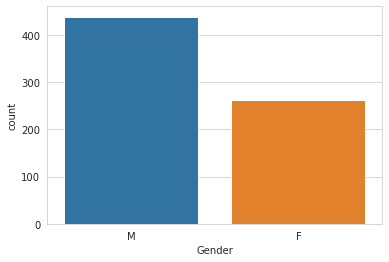

In [12]:
sns.countplot(categorical_df['Gender']);

In [13]:
# no. of district
categorical_df['Distric'].unique()

array(['Magura', 'Jhenidah'], dtype=object)

In [14]:
# summary of district 
rp.summary_cat(categorical_df['Distric'])

,Variable,Outcome,Count,Percent
0,Distric,Magura,641,91.57
1,,Jhenidah,59,8.43


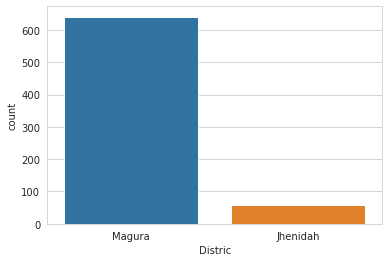

In [15]:
sns.countplot(categorical_df['Distric']);

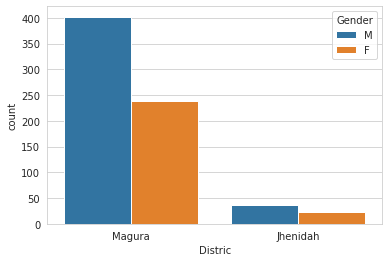

In [16]:
sns.countplot(categorical_df['Distric'], hue=categorical_df['Gender']);

In [17]:
# no. of thana 
categorical_df['Thana'].unique() 

array(['Shalikha', 'Kaligonj'], dtype=object)

In [18]:
# summary of thana 
rp.summary_cat(categorical_df['Thana'])

,Variable,Outcome,Count,Percent
0,Thana,Shalikha,641,91.57
1,,Kaligonj,59,8.43


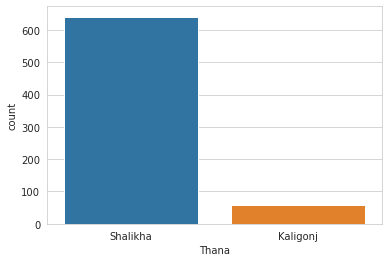

In [19]:
sns.countplot(categorical_df['Thana'])

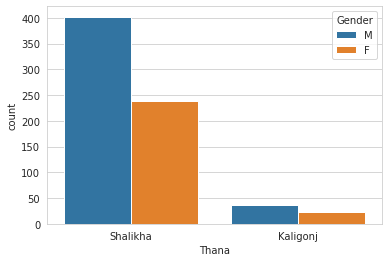

In [20]:
sns.countplot(categorical_df['Thana'], hue=categorical_df['Gender']);

In [21]:
# number of categories 
categorical_df['Type of disease'].unique() 

array(['N', 'Asthama, CVD', 'Night fever', 'Asthama ', 'Waist pain',
       'Asthama', 'Arthritis, gastric, vision', 'CVD', 'Leg problem',
       'Paralysis', 'CVD, Arthritis', 'Arthritis ', 'Diabetes',
       'Gastric, constipation', 'Vision', 'Allergy', 'CVD, Gastric',
       'Arthritis', 'CVD, Spasm, asthama', 'Migraine', 'Gastric ',
       'Gastric', 'CVD, Asthama', 'Arthritis, gastric', 'Insomnia, CVD',
       'Kidney problem', 'Neck pain', 'Back pain', 'knee pain',
       'Kideney problem, CVD', 'Asthama, Arthritis', 'Chest pain',
       'Kidney problem, CVD', 'Insomnia ', 'Dementia', 'CVD, Diabetes',
       'Epilepsy', 'Dementia, Insomnia', 'muscle spasm'], dtype=object)

In [22]:
# summary of type of disease 
rp.summary_cat(categorical_df['Type of disease'])

,Variable,Outcome,Count,Percent
0,Type of disease,N,477,68.14
1,,CVD,34,4.86
2,,Diabetes,33,4.71
3,,Asthama,19,2.71
4,,Gastric,18,2.57
5,,Arthritis,16,2.29
6,,Migraine,13,1.86
7,,Back pain,11,1.57
8,,knee pain,11,1.57
9,,Allergy,11,1.57


In [34]:
# summary of regularly taken medication
rp.summary_cat(categorical_df['Regularly taken medication'])

,Variable,Outcome,Count,Percent
0,Regularly taken medication,N,541,77.29
1,,Cardioascular drugs,32,4.57
2,,Anti-diabetic,28,4.00
3,,Homeopathy,26,3.71
4,,NSAID,23,3.29
5,,PPI,19,2.71
6,,Anti-histamine,10,1.43
7,,Sedative,6,0.86
8,,Pain killer,5,0.71
9,,Corticosteroid,3,0.43


In [23]:
# no. of categories 
categorical_df['Diabetes'].unique() 

array(['N', 'Y'], dtype=object)

In [24]:
# summary of diabetes
rp.summary_cat(categorical_df['Diabetes'])

,Variable,Outcome,Count,Percent
0,Diabetes,N,665,95.0
1,,Y,35,5.0


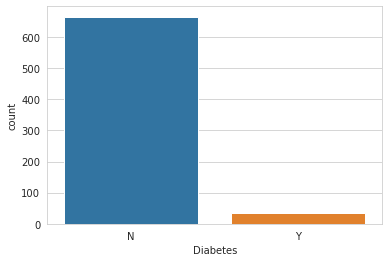

In [25]:
sns.countplot(categorical_df['Diabetes']);

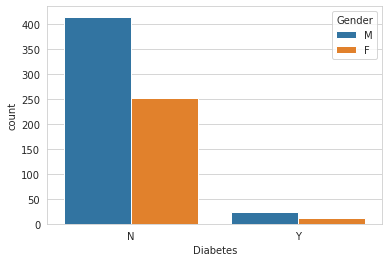

In [26]:
sns.countplot(categorical_df['Diabetes'], hue=categorical_df['Gender']);

In [27]:
# no. of categories 
categorical_df['Steps to control diabetes'].unique()

array(['N', 'Medication', 'Medication, exercise', 'Insulin'], dtype=object)

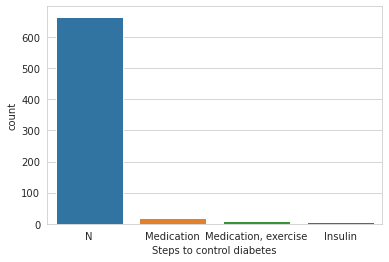

In [28]:
# summary of steps to control diabetes
sns.countplot(categorical_df['Steps to control diabetes']);

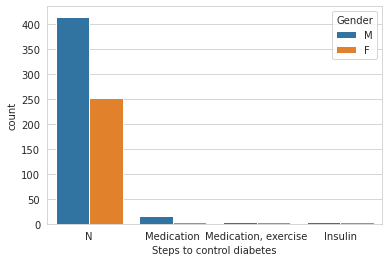

In [29]:
sns.countplot(categorical_df['Steps to control diabetes'], hue=categorical_df['Gender']);

In [30]:
categorical_df.columns

Index(['Name', 'Gender', 'Village', 'Thana', 'Distric', 'Type of disease',
       'Regularly taken medication', 'Diabetes', 'Steps to control diabetes',
       'Blood pressure', 'Diabetic patient in family history',
       'Knowledge about drug induce diabetes',
       'Knowledge about diabetes in children and young adult',
       'Knowledge about diabetes and pregnency',
       'Currently smoking tobacco product',
       'Previously somking tobacco products',
       'Age when tobacco products were taken first',
       'Age of stopping tobacco products', 'Taking betel', 'Taking betel nut',
       'Tobaco with betel', 'Relationship between smoking and cancer',
       'Relationship between smoking and diabetes',
       'Amount of slat taken with foods', 'Amount of time spend in activity',
       'Walking 10 minutes at a straight ', 'Disturbance in sleep'],
      dtype='object')

In [31]:
categorical_df['Blood pressure'].unique()

array(['L', 'H', 'No.'], dtype=object)

In [32]:
rp.summary_cat(categorical_df['Blood pressure'])

,Variable,Outcome,Count,Percent
0,Blood pressure,No.,622,88.86
1,,L,53,7.57
2,,H,25,3.57


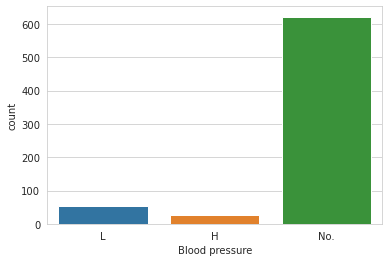

In [33]:
sns.countplot(categorical_df['Blood pressure']);

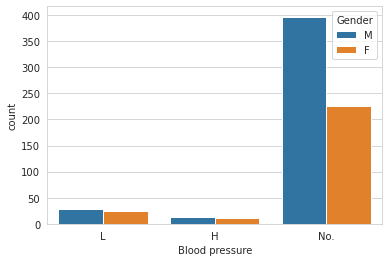

In [34]:
sns.countplot(categorical_df['Blood pressure'], hue=categorical_df['Gender']);

In [35]:
rp.crosstab(df['Gender'], df['Type of disease'])

Type of disease                                          \
Type of disease         Allergy Arthritis Arthritis  Arthritis, gastric   
Gender                                                                    
F                             1        10          1                  1   
M                            10         6          0                  0   
All                          11        16          1                  1   

                                                             \
Type of disease Arthritis, gastric, vision Asthama Asthama    
Gender                                                        
F                                        1       5        1   
M                                        0      14        0   
All                                      1      19        1   

                                                           ...                \
Type of disease Asthama, Arthritis Asthama, CVD Back pain  ... Migraine    N   
Gender                                                     ...                 
F                                0            1         4  ...       13  159   
M                                1            0         7  ...        0  318   
All                              1            1        11  ...       13  477   

                                                                             \
Type of disease Neck pain Night fever Paralysis Vision Waist pain knee pain   
Gender                                                                        
F                       0           3         0      3          3         9   
M                       3           1         2      4          2         2   
All                     3           4         2      7          5        11   

                                   
Type of disease muscle spasm  All  
Gender                             
F                          0  262  
M                          1  438  
All                        1  700  

[3 rows x 40 columns]

In [36]:
# numerical columns 
numeric_df = df.select_dtypes(exclude=[object])
numeric_df.head()

,Participants,Age,No. of days of eating fruits in a week,No. of days of eating vegetables in a week,No.of days of eating meats in week,No.of days of eating fish in week,No.of days of eating milk in week,No.of days of eating lentil in week,No.of days of eating soft drinks in week,No. of days in a week engaged in activities,No.of days of walking about 10 minutes in a week,Fitness activity in a week,Amount of time spent in fitness activities,Sleeping in a whole day,Sleeping at night time,NAP
0,1,70,0,7,1,7,0,2,0,0,3,0,0,6,6,0
1,2,65,0,7,1,7,0,2,0,0,0,0,0,8,8,0
2,3,35,0,7,1,7,0,2,0,7,7,0,0,6,6,0
3,4,38,0,7,1,7,0,2,0,7,7,0,0,7,7,0
4,5,32,1,7,3,7,0,3,0,7,7,0,0,6,6,0


In [37]:
numeric_df.shape

(700, 16)

## Univariate Analysis 

In [38]:
rp.codebook(df['Age'])

Variable: Age    Data Type: int64 

 Number of Obs.: 700 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 50 

 Range: [20, 80] 
 Mean: 39.89 
 Standard Deviation: 13.46 
 Mode: 50 
 10th Percentile: 24.0 
 25th Percentile: 28.0 
 50th Percentile: 40.0 
 75th Percentile: 50.0 
 90th Percentile: 60.0 







In [39]:
# age 
df['Age'].describe() 

count    700.000000
mean      39.892857
std       13.456812
min       20.000000
25%       28.000000
50%       40.000000
75%       50.000000
max       80.000000
Name: Age, dtype: float64

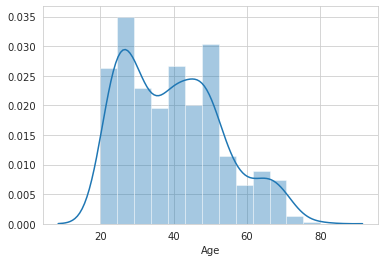

In [40]:
# distributions
sns.distplot(df['Age']);

In [41]:
# Normality test 
stats, p = stats.shapiro(df['Age'])
alpha = 0.05
if p > alpha: 
    print('The sample has normal distribution(Fail tor reject H0, the result is not significant)')
else: 
    print('The sample does not have normal distribution(Reject H0, the result is significant)')


The sample does not have normal distribution(Reject H0, the result is significant)


In [ ]:
# proportion of male and female 
rp.summary_cat(df['Gender'])

In [ ]:
# proportion of type of disease
rp.summary_cat(df['Type of disease'])

In [ ]:
# regularly taken medication
rp.summary_cat(df['Regularly taken medication'])

In [ ]:
# proportion of diabetes
rp.summary_cat(df['Diabetes'])

In [ ]:
df.columns

In [43]:
rp.summary_cat(df[['Gender', 'Diabetes', "Thana", "Distric"]])

,Variable,Outcome,Count,Percent
0,Gender,M,438,62.57
1,,F,262,37.43
2,Diabetes,N,665,95.00
3,,Y,35,5.00
4,Thana,Shalikha,641,91.57
5,,Kaligonj,59,8.43
6,Distric,Magura,641,91.57
7,,Jhenidah,59,8.43


In [44]:
rp.crosstab(df['Gender'], df['Diabetes'], prop="cell") 

Diabetes              
Diabetes        N     Y     All
Gender                         
F           35.86  1.57   37.43
M           59.14  3.43   62.57
All         95.00  5.00  100.00

In [ ]:
rp.crosstab(df['Gender'], df['Diabetes'], test="chi-square") 

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(df['Gender'], hue=df['Diabetes'])
plt.savefig("gender.png", dpi=200)

In [ ]:
df.info() 

In [ ]:
df['Age'].plot(kind='hist')

In [ ]:
df.isnull().sum() 

In [ ]:
df['Sleeping at night time'].value_counts() 

In [ ]:
df['Relationship between smoking and cancer'].value_counts() 

In [ ]:
df['Disturbance in sleep'].value_counts() 

In [ ]:
df['Gender'].value_counts() 

In [ ]:
df['Distric'].value_counts() 

In [ ]:
df.shape 

In [ ]:
df['Disturbance in sleep'].value_counts() 

In [ ]:
df['Type of disease'].value_counts() 